In [0]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Jupyter Notebookの中でインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Kaggle')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [0]:
# IDはモデルの予測に不要のため、一旦落とす
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

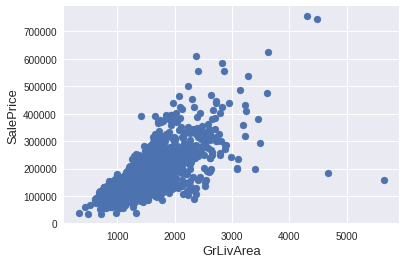

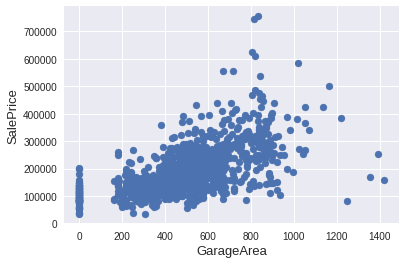

In [0]:
#分かっている外れ値を削除

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

train = train[train['GarageArea'] < 1150]
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

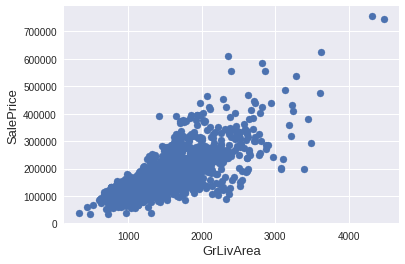

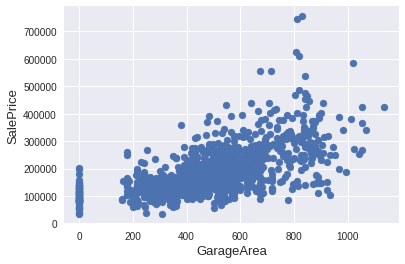

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


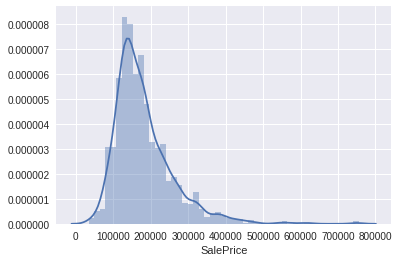

In [0]:
#目的関数変形
sns.distplot(train['SalePrice'])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


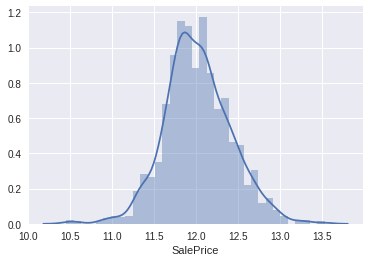

In [0]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'])
plt.show()

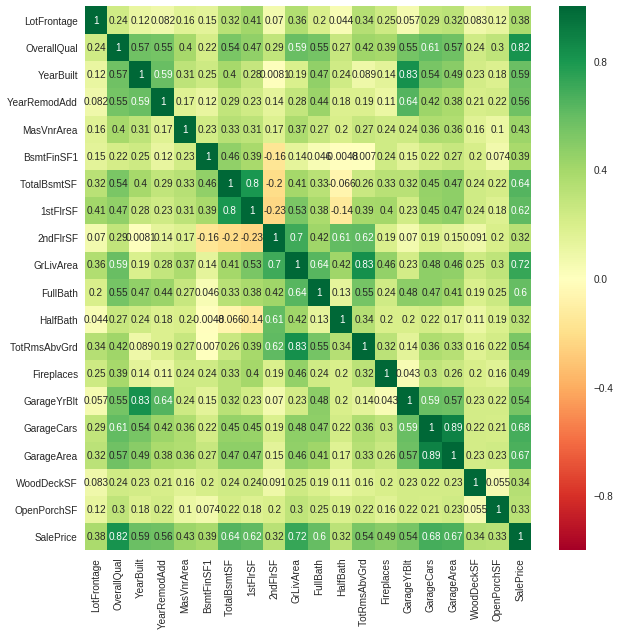

In [0]:
#とりあえず相関を見てみる
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.3]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(), annot = True, cmap="RdYlGn")

In [0]:
#Label Encode

train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [0]:
train["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [0]:
#NaNの対処

nuls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nuls.columns = ['Null Count']
nuls.index.name = 'Feature'
nuls

,Null Count
Feature,
PoolQC,1447
MiscFeature,1400
Alley,1362
Fence,1172
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageCond,81
GarageFinish,81


In [0]:
# 全データを一旦結合
# テストも含めた全データで特徴量を見ていく（例：欠損値を補完する際のmedian値など）
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data

all_data size is : (2912, 79)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# TOP30だけを一旦見る
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Percent missing data by feature')

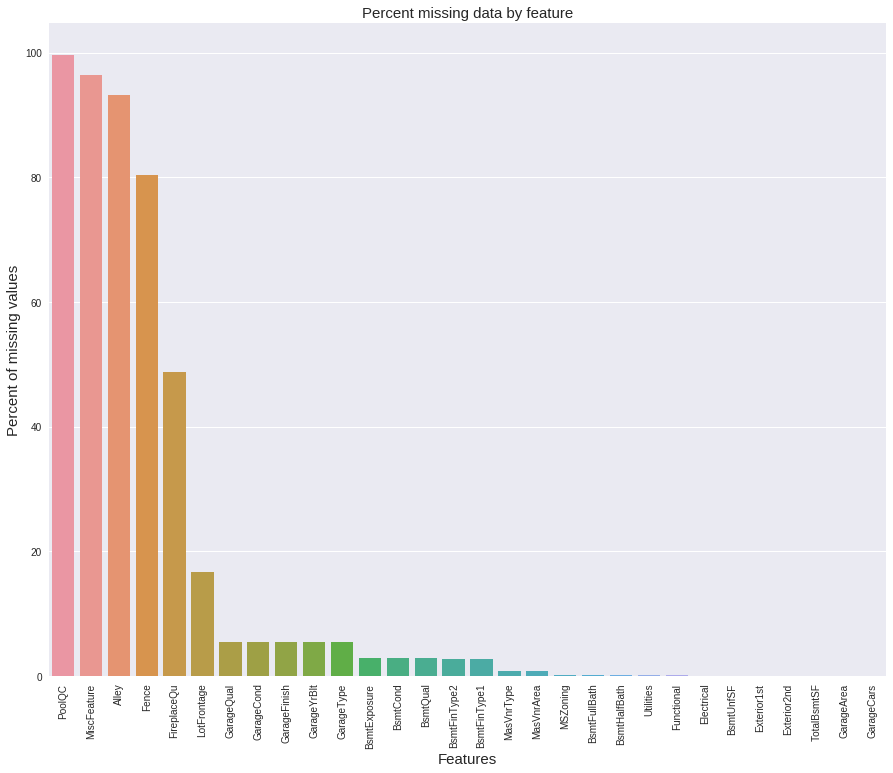

In [0]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [0]:
print(all_data.MSSubClass.value_counts(),"\n")

20     1076
60      573
50      287
120     182
30      138
160     128
70      128
80      118
90      109
190      60
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64 



In [0]:
#None nonnon
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#meanLotFrontage（間口の広さ）はNeighborhoodに関係ありそうだから、Neighborhoodごとの中間値を欠損値に格納するようにする
#neighborhoodよりLotの方が関係ありそう
grouped_df = all_data.groupby('MSSubClass')['LotFrontage']
grouped_df.mean()

MSSubClass
20     77.620651
30     60.480000
40     53.400000
45     55.555556
50     63.156489
60     78.395455
70     64.213675
75     74.523810
80     78.635294
85     73.437500
90     70.836957
120    44.653333
150          NaN
160    26.887931
180    26.250000
190    68.228070
Name: LotFrontage, dtype: float64

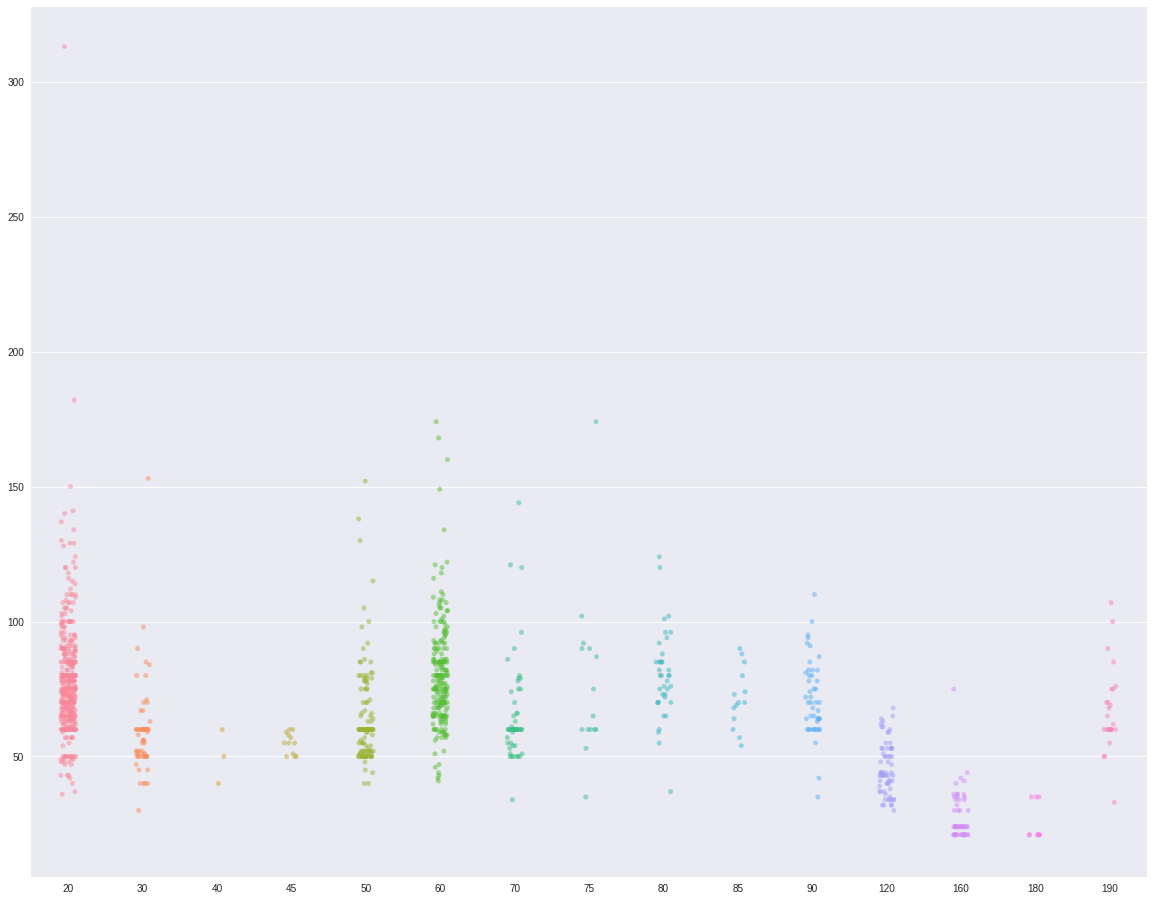

In [0]:
f, ax = plt.subplots(figsize=(20, 16))
sns.stripplot(x = train.MSSubClass.values, y = train.LotFrontage.values, jitter=0.1, alpha=0.5)

In [0]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

all_data["LotFrontage"].isnull().sum()

0

In [0]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data = all_data.drop(['Utilities'], axis=1)

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
MSZoning,0.137363
Functional,0.068681
SaleType,0.034341
KitchenQual,0.034341
Exterior2nd,0.034341
Exterior1st,0.034341
Electrical,0.034341


In [0]:
#Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleTypeもカテゴリー型のため、最頻値で埋めるようにする
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#MSZoningはRLが最も多い値なのでRLで埋める
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


In [0]:
#数値型のカテゴリーをきちんとカテゴリー型に変換しない場合、モデルによっては数値の大小関係を判断してしまう。 そのためちゃんと変換が必要
all_data['OverallCond'].value_counts()

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [0]:
all_data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass        object
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object


In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2912, 78)


In [0]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
# 相関の強い2つを掛け合わせる
# https://www.kaggle.com/katotaka/prediction-house-prices-eda
all_data["Interaction"] = all_data["TotalSF"] * all_data["OverallQual"]

In [0]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.930609
PoolArea,17.673354
LotArea,13.166700
LowQualFinSF,12.073977
3SsnPorch,11.362112
LandSlope,4.990731
KitchenAbvGr,4.296287
BsmtFinSF2,4.140401
EnclosedPorch,3.998474
ScreenPorch,3.941117


In [0]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 60 skewed numerical features to Box Cox transform


In [0]:
all_data = pd.get_dummies(all_data)

train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1453, 221)

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import xgboost as xgb
import lightgbm as lgb

In [0]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
'''
lr = linear_model.LinearRegression()
score = rmsle_cv(lr)
print("Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
'''

'\nlr = linear_model.LinearRegression()\nscore = rmsle_cv(lr)\nprint("Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\n'

In [0]:
pip install optuna

    100% |████████████████████████████████| 71kB 3.4MB/s 
    100% |████████████████████████████████| 81kB 7.3MB/s 
    100% |████████████████████████████████| 92kB 26.3MB/s 
    100% |████████████████████████████████| 51kB 20.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/52/a4/fe869e238d0d6b290dcb8ec7415f69ae17ddb38c1bd080a220
  Stored in directory: /root/.cache/pip/wheels/92/f0/ac/2ba2972034e98971c3654ece337ac61e546bdeb34ca960dc8c
Successfully built optuna pyperclip


In [0]:
import optuna
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [0]:
#トレインの特徴量train.values
#トレインの目的変数y_train
#テストの特徴量test.values
#テストの目的変数なし
'''
#トレーニングデータの分割 fpt:for param tuning
n_split = int(train.values.shape[0]*0.7)
x_train_fpt, x_val_fpt = train.values[:n_split], train.values[n_split:]
y_train_fpt, y_val_fpt = y_train[:n_split], y_train[n_split:]
'''
x_train_fpt, x_val_fpt = train_test_split(train.values, test_size=0.2, shuffle=True,random_state=42)
y_train_fpt, y_val_fpt = train_test_split(y_train, test_size=0.2, shuffle=True,random_state=42)

def opt_KRR(trial):
    alpha_opt = trial.suggest_uniform('alpha', 0, 1.0)

    tuna = KernelRidge(
        alpha=alpha_opt, kernel='polynomial', degree=2, coef0=2.5
    )
    tuna.fit(x_train_fpt, y_train_fpt)
    tuna_pred = tuna.predict(x_val_fpt)
    return mean_squared_error(y_val_fpt, tuna_pred)

In [0]:
study_KRR = optuna.create_study()
study_KRR.optimize(opt_KRR,n_trials=100)
# 最適解
print(study_KRR.best_params)
print(study_KRR.best_value)
print(study_KRR.best_trial) 

[I 2019-04-02 07:18:42,571] Finished trial#0 resulted in value: 0.016352076787485244. Current best value is 0.016352076787485244 with parameters: {'alpha': 0.390240052264214}.
[I 2019-04-02 07:18:42,730] Finished trial#1 resulted in value: 0.016364826797972628. Current best value is 0.016352076787485244 with parameters: {'alpha': 0.390240052264214}.
[I 2019-04-02 07:18:42,890] Finished trial#2 resulted in value: 0.018067589961498348. Current best value is 0.016352076787485244 with parameters: {'alpha': 0.390240052264214}.
[I 2019-04-02 07:18:43,038] Finished trial#3 resulted in value: 0.01628650010672698. Current best value is 0.01628650010672698 with parameters: {'alpha': 0.4409470978015232}.
[I 2019-04-02 07:18:43,191] Finished trial#4 resulted in value: 0.017346730156966216. Current best value is 0.01628650010672698 with parameters: {'alpha': 0.4409470978015232}.
[I 2019-04-02 07:18:43,326] Finished trial#5 resulted in value: 0.01599970763306206. Current best value is 0.015999707633

{'alpha': 0.9999411303740516}
0.015972803547412644
FrozenTrial(number=92, state=<TrialState.COMPLETE: 1>, value=0.015972803547412644, datetime_start=datetime.datetime(2019, 4, 2, 7, 18, 58, 63253), datetime_complete=datetime.datetime(2019, 4, 2, 7, 18, 58, 189770), params={'alpha': 0.9999411303740516}, user_attrs={}, system_attrs={'_number': 92}, intermediate_values={}, params_in_internal_repr={'alpha': 0.9999411303740516}, trial_id=92)


In [0]:
KRR = KernelRidge(alpha=study_KRR.best_params["alpha"], kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score1: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score1: 0.1151 (0.0134)



In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score1: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score1: 0.1159 (0.0134)



In [0]:
def opt_lasso(trial):
    alpha_opt = trial.suggest_uniform('alpha', 0, 1.0)

    tuna = make_pipeline(
        RobustScaler(), Lasso(alpha=alpha_opt, random_state=1)
    )
    tuna.fit(x_train_fpt, y_train_fpt)
    tuna_pred = tuna.predict(x_val_fpt)
    return mean_squared_error(y_val_fpt, tuna_pred)

study_lasso = optuna.create_study()
study_lasso.optimize(opt_lasso, n_trials=100)
# 最適解
print(study_lasso.best_params)
print(study_lasso.best_value)
print(study_lasso.best_trial) 

[I 2019-04-02 07:19:01,163] Finished trial#0 resulted in value: 0.1532070310551464. Current best value is 0.1532070310551464 with parameters: {'alpha': 0.7546857267006716}.
[I 2019-04-02 07:19:01,267] Finished trial#1 resulted in value: 0.153416438905874. Current best value is 0.1532070310551464 with parameters: {'alpha': 0.7546857267006716}.
[I 2019-04-02 07:19:01,370] Finished trial#2 resulted in value: 0.1531709671582056. Current best value is 0.1531709671582056 with parameters: {'alpha': 0.8306204591396334}.
[I 2019-04-02 07:19:01,476] Finished trial#3 resulted in value: 0.15336255173893895. Current best value is 0.1531709671582056 with parameters: {'alpha': 0.8306204591396334}.
[I 2019-04-02 07:19:01,581] Finished trial#4 resulted in value: 0.15325202853300907. Current best value is 0.1531709671582056 with parameters: {'alpha': 0.8306204591396334}.
[I 2019-04-02 07:19:01,695] Finished trial#5 resulted in value: 0.15353993873086147. Current best value is 0.1531709671582056 with par

{'alpha': 0.001117138590405407}
0.016619366497658997
FrozenTrial(number=44, state=<TrialState.COMPLETE: 1>, value=0.016619366497658997, datetime_start=datetime.datetime(2019, 4, 2, 7, 19, 6, 431057), datetime_complete=datetime.datetime(2019, 4, 2, 7, 19, 6, 753753), params={'alpha': 0.001117138590405407}, user_attrs={}, system_attrs={'_number': 44}, intermediate_values={}, params_in_internal_repr={'alpha': 0.001117138590405407}, trial_id=44)


In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =study_lasso.best_params["alpha"], random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1148 (0.0146)



In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1128 (0.0148)



In [0]:
def opt_Enet(trial):
    alpha_opt = trial.suggest_uniform('alpha', 0, 0.2)
    l1_ratio_opt = trial.suggest_uniform('l1_ratio', 0, 1.0)

    tuna = make_pipeline(
        RobustScaler(), ElasticNet(alpha=alpha_opt, l1_ratio=l1_ratio_opt, random_state=3)
    )
    tuna.fit(x_train_fpt, y_train_fpt)
    tuna_pred = tuna.predict(x_val_fpt)
    return mean_squared_error(y_val_fpt, tuna_pred)

study_Enet = optuna.create_study()
study_Enet.optimize(opt_Enet, n_trials=100)
# 最適解
print(study_Enet.best_params)
print(study_Enet.best_value)
print(study_Enet.best_trial) 

study_Enet.best_params

[I 2019-04-02 07:19:17,923] Finished trial#0 resulted in value: 0.02050222946168776. Current best value is 0.02050222946168776 with parameters: {'alpha': 0.14100047445345573, 'l1_ratio': 0.04566638780674148}.
[I 2019-04-02 07:19:18,087] Finished trial#1 resulted in value: 0.019105291266775192. Current best value is 0.019105291266775192 with parameters: {'alpha': 0.019815453376438998, 'l1_ratio': 0.3451678524702051}.
[I 2019-04-02 07:19:18,196] Finished trial#2 resulted in value: 0.06439174971749193. Current best value is 0.019105291266775192 with parameters: {'alpha': 0.019815453376438998, 'l1_ratio': 0.3451678524702051}.
[I 2019-04-02 07:19:18,316] Finished trial#3 resulted in value: 0.03470230822932586. Current best value is 0.019105291266775192 with parameters: {'alpha': 0.019815453376438998, 'l1_ratio': 0.3451678524702051}.
[I 2019-04-02 07:19:18,438] Finished trial#4 resulted in value: 0.025191348168568183. Current best value is 0.019105291266775192 with parameters: {'alpha': 0.01

{'alpha': 0.0002601602281208482, 'l1_ratio': 0.7984530426279999}
0.014446667441405795
FrozenTrial(number=84, state=<TrialState.COMPLETE: 1>, value=0.014446667441405795, datetime_start=datetime.datetime(2019, 4, 2, 7, 19, 33, 737958), datetime_complete=datetime.datetime(2019, 4, 2, 7, 19, 34, 318094), params={'alpha': 0.0002601602281208482, 'l1_ratio': 0.7984530426279999}, user_attrs={}, system_attrs={'_number': 84}, intermediate_values={}, params_in_internal_repr={'alpha': 0.0002601602281208482, 'l1_ratio': 0.7984530426279999}, trial_id=84)


{'alpha': 0.0002601602281208482, 'l1_ratio': 0.7984530426279999}

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=study_Enet.best_params["alpha"], l1_ratio=study_Enet.best_params["l1_ratio"], random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause p

ElasticNet score: 0.1135 (0.0135)



In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1127 (0.0148)



In [0]:
def opt_GBoost(trial):
    learning_rate_opt = trial.suggest_uniform('learning_rate', 0, 0.1)
    n_estimators_opt = trial.suggest_int('n_estimators', 1, 5000)
    max_depth_opt = trial.suggest_int('max_depth', 1, 10)
    min_samples_leaf_opt = trial.suggest_int('min_sample_leaf',1,20)
    

    tuna = GradientBoostingRegressor(n_estimators=n_estimators_opt, learning_rate=learning_rate_opt,
                                   max_depth=max_depth_opt, max_features='sqrt',
                                   min_samples_leaf=min_samples_leaf_opt, min_samples_split=10, 
                                   loss='huber', random_state =5)
    tuna.fit(x_train_fpt, y_train_fpt)
    tuna_pred = tuna.predict(x_val_fpt)
    return mean_squared_error(y_val_fpt, tuna_pred)

study_GBoost = optuna.create_study()
study_GBoost.optimize(opt_GBoost, n_trials=100)
# 最適解
print(study_GBoost.best_params)
print(study_GBoost.best_value)
print(study_GBoost.best_trial) 

[I 2019-04-02 07:19:55,768] Finished trial#0 resulted in value: 0.016637934666331997. Current best value is 0.016637934666331997 with parameters: {'learning_rate': 0.0893791562113078, 'n_estimators': 4101, 'max_depth': 7, 'min_sample_leaf': 14}.
[I 2019-04-02 07:20:10,626] Finished trial#1 resulted in value: 0.01719587124336107. Current best value is 0.016637934666331997 with parameters: {'learning_rate': 0.0893791562113078, 'n_estimators': 4101, 'max_depth': 7, 'min_sample_leaf': 14}.
[I 2019-04-02 07:20:11,935] Finished trial#2 resulted in value: 0.031480258023124534. Current best value is 0.016637934666331997 with parameters: {'learning_rate': 0.0893791562113078, 'n_estimators': 4101, 'max_depth': 7, 'min_sample_leaf': 14}.
[I 2019-04-02 07:20:15,040] Finished trial#3 resulted in value: 0.015806190234456438. Current best value is 0.015806190234456438 with parameters: {'learning_rate': 0.07076315882548041, 'n_estimators': 2036, 'max_depth': 2, 'min_sample_leaf': 12}.
[I 2019-04-02 07

{'learning_rate': 0.05341356519549361, 'n_estimators': 3149, 'max_depth': 3, 'min_sample_leaf': 3}
0.014102753545946293
FrozenTrial(number=13, state=<TrialState.COMPLETE: 1>, value=0.014102753545946293, datetime_start=datetime.datetime(2019, 4, 2, 7, 21, 31, 538136), datetime_complete=datetime.datetime(2019, 4, 2, 7, 21, 38, 264431), params={'learning_rate': 0.05341356519549361, 'n_estimators': 3149, 'max_depth': 3, 'min_sample_leaf': 3}, user_attrs={}, system_attrs={'_number': 13}, intermediate_values={}, params_in_internal_repr={'learning_rate': 0.05341356519549361, 'n_estimators': 3149, 'max_depth': 3, 'min_sample_leaf': 3}, trial_id=13)


In [0]:
GBoost =  GradientBoostingRegressor(n_estimators=study_GBoost.best_params["n_estimators"], learning_rate=study_GBoost.best_params["learning_rate"],
                                   max_depth=study_GBoost.best_params["max_depth"], max_features='sqrt',
                                   min_samples_leaf=study_GBoost.best_params["min_sample_leaf"], min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

'''
#Gradient Boosting score: 0.1148 (0.0144)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
'''

Gradient Boosting score: 0.1120 (0.0129)



'\n#Gradient Boosting score: 0.1148 (0.0144)\nGBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,\n                                   max_depth=4, max_features=\'sqrt\',\n                                   min_samples_leaf=15, min_samples_split=10, \n                                   loss=\'huber\', random_state =5)\nscore = rmsle_cv(GBoost)\nprint("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\n'

In [0]:
#Gradient Boosting score: 0.1148 (0.0144)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1148 (0.0144)



In [0]:
def opt_XGB(trial):
    learning_rate_opt = trial.suggest_uniform('learning_rate', 0, 0.1)
    n_estimators_opt = trial.suggest_int('n_estimators', 1, 5000)
    max_depth_opt = trial.suggest_int('max_depth', 1, 10)
    min_child_weight_opt = trial.suggest_uniform('min_child_weight',1,10)
    colsample_bytree_opt = trial.suggest_uniform('colsample_bytree', 0,1)
    

    tuna = xgb.XGBRegressor(colsample_bytree=colsample_bytree_opt, gamma=0.0468, 
                             learning_rate=learning_rate_opt, max_depth=max_depth_opt, 
                             min_child_weight=min_child_weight_opt, n_estimators=n_estimators_opt,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    tuna.fit(x_train_fpt, y_train_fpt)
    tuna_pred = tuna.predict(x_val_fpt)
    return mean_squared_error(y_val_fpt, tuna_pred)

study_XGB = optuna.create_study()
study_XGB.optimize(opt_XGB, n_trials=100)
# 最適解
print(study_XGB.best_params)
print(study_XGB.best_value)
print(study_XGB.best_trial) 

study_XGB.best_params

[I 2019-04-02 07:35:48,473] Finished trial#0 resulted in value: 0.016541216573411947. Current best value is 0.016541216573411947 with parameters: {'learning_rate': 0.025818110904146277, 'n_estimators': 2160, 'max_depth': 5, 'min_child_weight': 8.66754425114582, 'colsample_bytree': 0.6824367626836385}.
[I 2019-04-02 07:36:17,889] Finished trial#1 resulted in value: 0.016445902004627727. Current best value is 0.016445902004627727 with parameters: {'learning_rate': 0.0025056575127750946, 'n_estimators': 4880, 'max_depth': 10, 'min_child_weight': 5.265471551552629, 'colsample_bytree': 0.45424914641244474}.
[I 2019-04-02 07:36:22,018] Finished trial#2 resulted in value: 0.016836143322653055. Current best value is 0.016445902004627727 with parameters: {'learning_rate': 0.0025056575127750946, 'n_estimators': 4880, 'max_depth': 10, 'min_child_weight': 5.265471551552629, 'colsample_bytree': 0.45424914641244474}.
[I 2019-04-02 07:36:34,213] Finished trial#3 resulted in value: 0.01555479333852541

{'learning_rate': 0.05483268074613652, 'n_estimators': 2625, 'max_depth': 5, 'min_child_weight': 1.9667843257471822, 'colsample_bytree': 0.37658738100777167}
0.014977513673369889
FrozenTrial(number=70, state=<TrialState.COMPLETE: 1>, value=0.014977513673369889, datetime_start=datetime.datetime(2019, 4, 2, 7, 50, 27, 26137), datetime_complete=datetime.datetime(2019, 4, 2, 7, 50, 37, 420999), params={'learning_rate': 0.05483268074613652, 'n_estimators': 2625, 'max_depth': 5, 'min_child_weight': 1.9667843257471822, 'colsample_bytree': 0.37658738100777167}, user_attrs={}, system_attrs={'_number': 70}, intermediate_values={}, params_in_internal_repr={'learning_rate': 0.05483268074613652, 'n_estimators': 2625, 'max_depth': 5, 'min_child_weight': 1.9667843257471822, 'colsample_bytree': 0.37658738100777167}, trial_id=70)


{'colsample_bytree': 0.37658738100777167,
 'learning_rate': 0.05483268074613652,
 'max_depth': 5,
 'min_child_weight': 1.9667843257471822,
 'n_estimators': 2625}

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=study_XGB.best_params["colsample_bytree"], gamma=0.0468, 
                             learning_rate=study_XGB.best_params["learning_rate"], max_depth=study_XGB.best_params["max_depth"], 
                             min_child_weight=study_XGB.best_params["min_child_weight"], n_estimators=study_XGB.best_params["n_estimators"],
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

'''
#Xgboost score: 0.1162 (0.0147)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

def xgb_regressor(learn_rate):
  model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=learn_rate, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
  score = rmsle_cv(model_xgb)
  print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
  
  

xgb_regressor(0.03)
xgb_regressor(0.04)
xgb_regressor(0.05)
xgb_regressor(0.08)
xgb_regressor(0.09)

def xgb_regressor_updated(learn_rate):
  model_xgb_updated = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=learn_rate, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
  score = rmsle_cv(model_xgb)
  print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
  return model_xgb_updated
'''
  

Xgboost score: 0.1196 (0.0133)



'\n#Xgboost score: 0.1162 (0.0147)\nmodel_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, \n                             learning_rate=0.05, max_depth=3, \n                             min_child_weight=1.7817, n_estimators=2200,\n                             reg_alpha=0.4640, reg_lambda=0.8571,\n                             subsample=0.5213, silent=1,\n                             random_state =7, nthread = -1)\nscore = rmsle_cv(model_xgb)\nprint("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\n\ndef xgb_regressor(learn_rate):\n  model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, \n                             learning_rate=learn_rate, max_depth=3, \n                             min_child_weight=1.7817, n_estimators=2200,\n                             reg_alpha=0.4640, reg_lambda=0.8571,\n                             subsample=0.5213, silent=1,\n                             random_state =7, nthread = -1)\n  score = rmsle_cv(model_xgb

In [0]:
def xgb_regressor1(learn_rate):
  model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=learn_rate, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
  score = rmsle_cv(model_xgb)
  print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
  
  

xgb_regressor1(0.03)
xgb_regressor1(0.04)
xgb_regressor1(0.05)
xgb_regressor1(0.08)
xgb_regressor1(0.09)

Xgboost score: 0.1162 (0.0147)

Xgboost score: 0.1181 (0.0147)

Xgboost score: 0.1180 (0.0137)

Xgboost score: 0.1217 (0.0148)

Xgboost score: 0.1217 (0.0158)



In [0]:
def opt_lgb(trial):
    learning_rate_opt = trial.suggest_uniform('learning_rate', 0, 0.1)
    n_estimators_opt = trial.suggest_int('n_estimators', 1, 5000)
    max_bin_opt = trial.suggest_int('max_bin', 1, 100)
    

    tuna = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate= learning_rate_opt, n_estimators=n_estimators_opt,
                              max_bin = max_bin_opt, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    tuna.fit(x_train_fpt, y_train_fpt)
    tuna_pred = tuna.predict(x_val_fpt)
    return mean_squared_error(y_val_fpt, tuna_pred)

study_lgb = optuna.create_study()
study_lgb.optimize(opt_lgb, n_trials=100)
# 最適解
print(study_lgb.best_params)
print(study_lgb.best_value)
print(study_lgb.best_trial) 

study_lgb.best_params

[I 2019-04-02 08:00:58,481] Finished trial#0 resulted in value: 0.016710998858045726. Current best value is 0.016710998858045726 with parameters: {'learning_rate': 0.002541517419733752, 'n_estimators': 3997, 'max_bin': 33}.
[I 2019-04-02 08:00:58,690] Finished trial#1 resulted in value: 0.01751568196592637. Current best value is 0.016710998858045726 with parameters: {'learning_rate': 0.002541517419733752, 'n_estimators': 3997, 'max_bin': 33}.
[I 2019-04-02 08:00:59,045] Finished trial#2 resulted in value: 0.01905712156196292. Current best value is 0.016710998858045726 with parameters: {'learning_rate': 0.002541517419733752, 'n_estimators': 3997, 'max_bin': 33}.
[I 2019-04-02 08:00:59,450] Finished trial#3 resulted in value: 0.01618754081215495. Current best value is 0.01618754081215495 with parameters: {'learning_rate': 0.0221133356980327, 'n_estimators': 1092, 'max_bin': 100}.
[I 2019-04-02 08:00:59,497] Finished trial#4 resulted in value: 0.0211034567580192. Current best value is 0.0

{'learning_rate': 0.006535227419261025, 'n_estimators': 2510, 'max_bin': 55}
0.01567499223127884
FrozenTrial(number=8, state=<TrialState.COMPLETE: 1>, value=0.01567499223127884, datetime_start=datetime.datetime(2019, 4, 2, 8, 1, 2, 136038), datetime_complete=datetime.datetime(2019, 4, 2, 8, 1, 3, 124364), params={'learning_rate': 0.006535227419261025, 'n_estimators': 2510, 'max_bin': 55}, user_attrs={}, system_attrs={'_number': 8}, intermediate_values={}, params_in_internal_repr={'learning_rate': 0.006535227419261025, 'n_estimators': 2510, 'max_bin': 55}, trial_id=8)


{'learning_rate': 0.006535227419261025, 'max_bin': 55, 'n_estimators': 2510}

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate= study_lgb.best_params["learning_rate"], n_estimators=study_lgb.best_params["n_estimators"],
                              max_bin = study_lgb.best_params["max_bin"], bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#LGBM score: 0.1153 (0.0146)

LGBM score: 0.1159 (0.0144)



In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate= 0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#LGBM score: 0.1153 (0.0146)

LGBM score: 0.1153 (0.0146)



In [0]:
'''
LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)
XGBMd = model_xgb.fit(train.values, y_train)
LGBMd = model_lgb.fit(train.values, y_train)

SyntaxError: ignored

In [0]:
'''
finalMd = (np.expm1(LassoMd.predict(test.values)) + np.expm1(ENetMd.predict(test.values)) + np.expm1(KRRMd.predict(test.values)) + np.expm1(GBoostMd.predict(test.values))  + np.expm1(XGBMd.predict(test.values))  + np.expm1(LGBMd.predict(test.values)) ) / 6
finalMd

In [0]:
'''
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = finalMd
sub.to_csv('saito_submission_tuna.csv',index=False)
